# Import libraries and packages

In [1]:
'''Prediction of activities for the given CDR
I learned this code from the following source link :
https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/'''
'''However, the following is coded by my own self'''

import numpy as np
import tensorflow as tf
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error


# Import the time-series data set

In [2]:

DS = pd.read_csv('Filtered_Grid_01.txt')

# Consider only the column 'Internet_Activity' from dataframe DS
dataset = DS['Internet_Activity']

# Change pandas series into numpy arrays
series = dataset.values
series = series.reshape([len(series), 1])


# Split data set into taining, validation, and test sets

In [3]:
# Data split such that training set consist of training_p percent data.
training_p = 0.4 #(80/10/10 split for Training/Validation/Test)

size_train_main = int(np.floor(len(series)*training_p))
size_val_main = int((len(series) - size_train_main)/2)
size_test_main = int((len(series) - size_train_main)/2)

## Split data
train_set_main = series[:size_train_main]
valid_set_main = series[size_train_main:-size_val_main]
test_set_main = series[size_train_main+size_val_main:]

# Prepare dataset to train a predictio model for time-series data
Step 1: y_train, y_val, y_test are the cloned version of x_train, x_val, x_test, respectively, but shifted by one time step.

Step 2: X_* is the input feature, y_* is the label.

### Details

The (x,y) set is rearranged such that for each value of x, the label y represent the next value in the series (hence y is shifted one step ahead of x). 

Mathemtically,  y(t) = x(t-1)

In [4]:
# Make x and y labels
X_train = pd.DataFrame(train_set_main)
y_train = X_train.shift(-1)

X_val = pd.DataFrame(valid_set_main)
y_val = X_val.shift(-1)

X_test = pd.DataFrame(test_set_main)
y_test = X_test.shift(-1)

# Drop the last element of X_* as we will not have any label for it.
X_train.drop(X_train.tail(1), inplace = True)
X_val.drop(X_test.tail(1), inplace = True)
X_test.drop(X_test.tail(1), inplace = True)

#Last element of y_* would have NaN, hence drop it.
y_train.dropna(inplace = True)
y_val.dropna(inplace = True)
y_test.dropna(inplace = True)
 

# Implementing LSTM

In [5]:

# Convert all the data frames to numpy arrays again.

X_train = X_train.values
y_train = y_train.values
X_val = X_val.values
y_val = y_val.values
X_test = X_test.values 

# How many steps do we want to proceed in the time series
n_steps = 1 

# How many features do we have in the time series
n_features = 1

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

model_LSTM = Sequential()
model_LSTM.add(LSTM(50, activation = 'relu', input_shape=(n_steps, n_features)))
# model.add(Dense(100, activation='relu'))
model_LSTM.add(Dense(1))
model_LSTM.compile(loss='mae', optimizer = 'adam')

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=0, shuffle=False)

### Plotting the training and validation losses

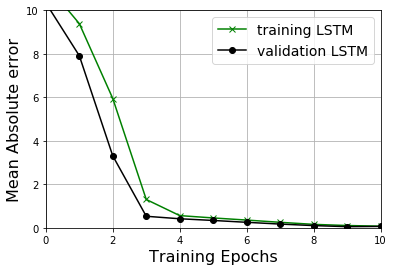

In [6]:
plt.plot(history_LSTM.history['loss'], "bx-", label='training LSTM', color = "green")
plt.plot(history_LSTM.history['val_loss'], "bo-", label='validation LSTM', color = "black")
plt.legend(fontsize=14)
plt.ylim(0,10)
plt.grid()
plt.xlabel('Training Epochs', fontsize=16)
plt.ylabel('Mean Absolute error', fontsize=16)
plt.xlim(0, 10)
plt.show()

### Predicting and plotting the future internet activities using LSTM (y_pred_LSTM)

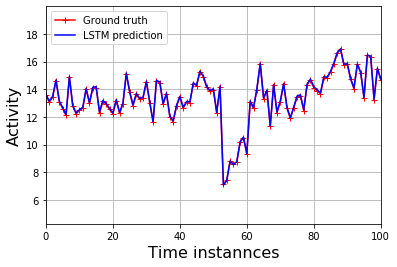

In [7]:

y_pred_LSTM = model_LSTM.predict(X_test)

plt.plot(y_test, "b-+", label='Ground truth', color = "red")
plt.plot(y_pred_LSTM, "-", label='LSTM prediction', color = "blue")
plt.legend()
plt.xlim(0, 100)
plt.legend(loc="upper left")
plt.xlabel('Time instannces', fontsize=16)
plt.ylabel('Activity', fontsize=16)
plt.grid()
plt.show()